# Decision Tree Regression

Problem Statement:


The video games sales dataset is a collection of data on video games and their sales across different regions of the world. The dataset contains information on more than 16,000 games, released from 1980 to 2020
Problem Statement
     To analyze the factors that influence the sales of video games and build a predictive model for global sales
Understanding Features



Name: The name of the video game

Platform: The platform on which the game is released (e.g., Xbox, PlayStation, PC)

Year_of_Release: The year in which the game was released

Genre: The genre of the game (e.g., action, sports, puzzle)

Publisher: The company that published the game

NA_Sales: The sales of the game in North America (in millions)

EU_Sales: The sales of the game in Europe (in millions)

JP_Sales: The sales of the game in Japan (in millions)

Other_Sales: The sales of the game in other regions of the world (in millions)

Global_Sales: The total sales of the game worldwide (in millions)

Critic_Score: The average score given by game critics (out of 100)

User_Score: The average score given by game users (out of 10)

Rating: The rating assigned to the game based on its content (e.g., E for Everyone, M for Mature)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [ ]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8.0,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN,NaN,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01


In [ ]:
data.shape

(16719, 16)

In [ ]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8.0,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN,NaN,31.37


In [ ]:
data.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.01


In [ ]:
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
Global_Sales       float64
dtype: object

In [ ]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000,16719.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,68.967679,26.360821,7.125046,162.229908,0.533543
std,5.878995,0.813514,0.503283,0.308818,0.186710,13.938165,18.980495,1.500006,561.282326,1.547935
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000,0.000000,4.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,12.000000,6.400000,10.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,21.000000,7.500000,24.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,36.000000,8.200000,81.000000,0.470000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,98.000000,113.000000,9.700000,10665.000000,82.530000


In [ ]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
Global_Sales          0
dtype: int64

In [ ]:
df=data.drop(['Developer','Name','Year_of_Release','Publisher','Rating'],axis=1)

In [ ]:
num=df._get_numeric_data() 
num.shape

(16719, 9)

In [ ]:
cat=df.drop(num,axis=1)
cat.nunique()

Platform    31
Genre       12
dtype: int64

In [ ]:
df.isnull().sum()

Platform           0
Genre              2
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Critic_Score    8582
Critic_Count    8582
User_Score      9129
User_Count      9129
Global_Sales       0
dtype: int64

In [ ]:
cat['Genre'].fillna(cat['Genre'].mode()[0],inplace=True)

In [ ]:
num_col = num.select_dtypes(include=['float64']).columns
data1 = num[num_col].fillna(num[num_col].mean())

In [ ]:
print(data1.isnull().sum())


NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
Global_Sales    0
dtype: int64


In [ ]:
cat.isnull().sum()

Platform    0
Genre       0
dtype: int64

In [ ]:
cat['Genre'].fillna(cat['Genre'].mode()[0],inplace=True)
cat.isnull().sum()

Platform    0
Genre       0
dtype: int64

In [ ]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
for i in cat:
  cat[i]=label.fit_transform(cat[i])
cat

,Platform,Genre
0,26,10
1,11,4
2,26,6
3,26,10
4,5,7
...,...,...
16714,17,0
16715,28,10
16716,20,1
16717,6,4


In [ ]:
data=data1.join(cat)
data

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales,Platform,Genre
0,41.36,28.96,3.77,8.45,76.000000,51.000000,8.000000,322.000000,82.53,26,10
1,29.08,3.58,6.81,0.77,68.967679,26.360821,7.125046,162.229908,40.24,11,4
2,15.68,12.76,3.79,3.29,82.000000,73.000000,8.300000,709.000000,35.52,26,6
3,15.61,10.93,3.28,2.95,80.000000,73.000000,8.000000,192.000000,32.77,26,10
4,11.27,8.89,10.22,1.00,68.967679,26.360821,7.125046,162.229908,31.37,5,7
...,...,...,...,...,...,...,...,...,...,...,...
16714,0.00,0.00,0.01,0.00,68.967679,26.360821,7.125046,162.229908,0.01,17,0
16715,0.00,0.01,0.00,0.00,68.967679,26.360821,7.125046,162.229908,0.01,28,10
16716,0.00,0.00,0.01,0.00,68.967679,26.360821,7.125046,162.229908,0.01,20,1
16717,0.01,0.00,0.00,0.00,68.967679,26.360821,7.125046,162.229908,0.01,6,4


In [ ]:
print(data.duplicated().sum())

2445


In [ ]:
df=data.drop_duplicates(inplace=False)

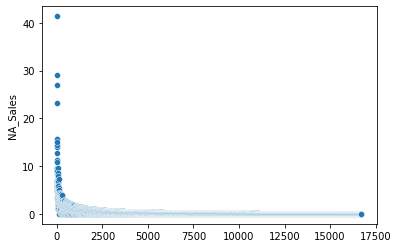

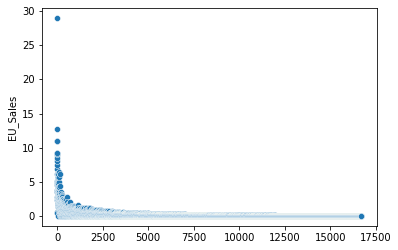

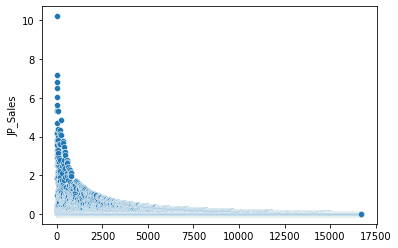

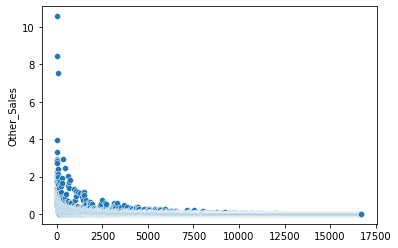

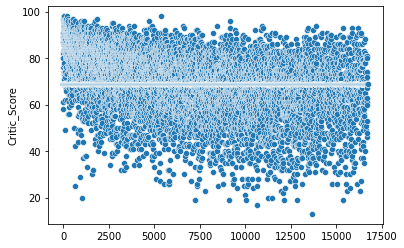

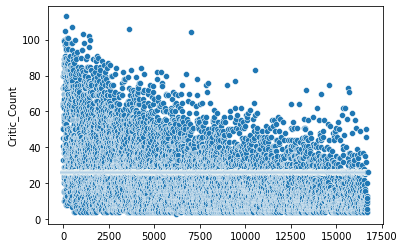

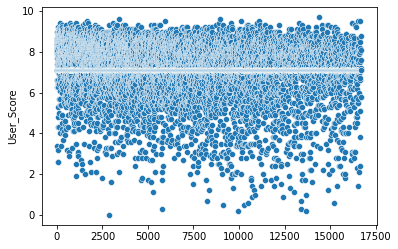

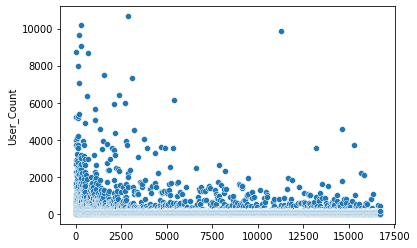

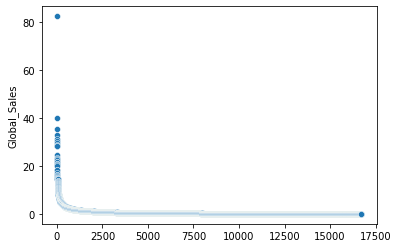

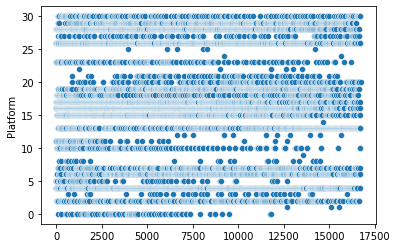

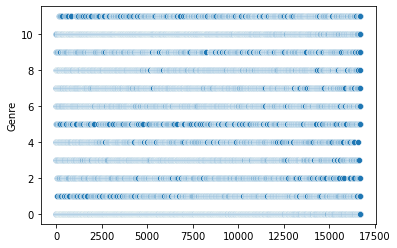

In [ ]:
for i in df:
  sns.scatterplot(df[i])
  plt.show()

In [ ]:
df.shape

(14274, 11)

In [ ]:
df.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Global_Sales', 'Platform',
       'Genre'],
      dtype='object')

In [ ]:
df.dtypes

NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Critic_Score    float64
Critic_Count    float64
User_Score      float64
User_Count      float64
Global_Sales    float64
Platform          int64
Genre             int64
dtype: object

In [ ]:
scaler = StandardScaler()
#scaler = RobustScaler()
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = scaler.fit_transform(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])


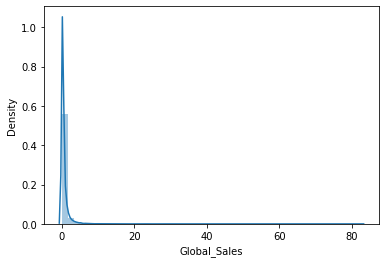

In [ ]:
sns.distplot(df['Global_Sales'])
plt.show()

In [ ]:
df['Global_Sales'].describe()

count    14274.000000
mean         0.612578
std          1.662008
min          0.010000
25%          0.080000
50%          0.220000
75%          0.560000
max         82.530000
Name: Global_Sales, dtype: float64

In [ ]:
df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales,Platform,Genre
0,46.998780,53.211179,11.087011,41.760938,76.000000,51.000000,8.000000,322.000000,82.53,26,10
1,32.941200,6.304857,20.232011,3.556309,68.967679,26.360821,7.125046,162.229908,40.24,11,4
2,17.601496,23.270973,11.147176,16.092203,82.000000,73.000000,8.300000,709.000000,35.52,26,6
3,17.521363,19.888839,9.612982,14.400852,80.000000,73.000000,8.000000,192.000000,32.77,26,10
4,12.553130,16.118591,30.490054,4.700458,68.967679,26.360821,7.125046,162.229908,31.37,5,7
...,...,...,...,...,...,...,...,...,...,...,...
16702,-0.336800,-0.311559,-0.253992,-0.274103,48.000000,10.000000,7.125046,162.229908,0.01,4,5
16706,-0.348248,-0.293077,-0.253992,-0.274103,60.000000,12.000000,7.200000,13.000000,0.01,13,11
16709,-0.348248,-0.293077,-0.253992,-0.274103,63.000000,6.000000,5.800000,8.000000,0.01,13,1
16713,-0.348248,-0.311559,-0.253992,-0.274103,68.967679,26.360821,7.125046,162.229908,0.01,16,6


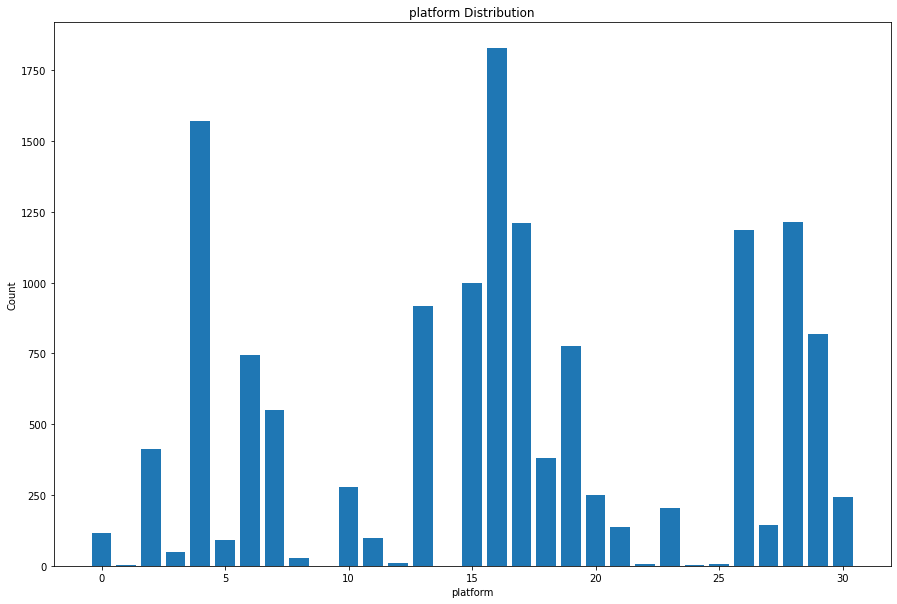

In [ ]:
platform_count=df['Platform'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(platform_count.index,platform_count.values)
plt.title('platform Distribution')
plt.xlabel('platform')
plt.ylabel('Count')
plt.show()

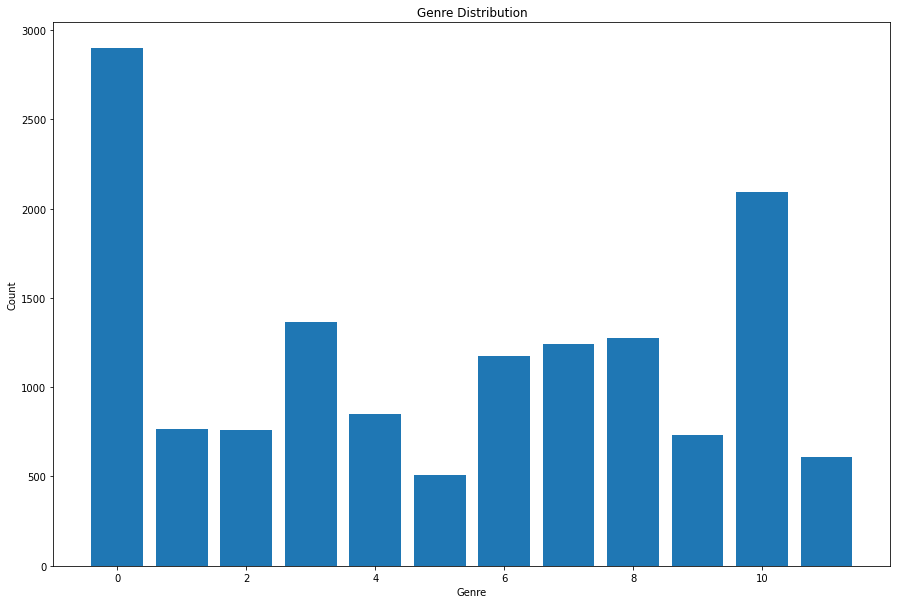

In [ ]:
genre_counts=df['Genre'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [ ]:
corrr=df.corr().abs()

In [ ]:
corrr

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales,Platform,Genre
NA_Sales,1.000000,0.762213,0.449541,0.634396,0.186534,0.228883,0.066622,0.190459,0.940317,0.031668,0.005715
EU_Sales,0.762213,1.000000,0.434467,0.719679,0.195783,0.246143,0.049081,0.251325,0.900056,0.035669,0.007033
JP_Sales,0.449541,0.434467,1.000000,0.288864,0.091864,0.108496,0.075478,0.045454,0.612642,0.093240,0.024642
Other_Sales,0.634396,0.719679,0.288864,1.000000,0.185832,0.235515,0.053564,0.224106,0.746390,0.047718,0.000531
Critic_Score,0.186534,0.195783,0.091864,0.185832,1.000000,0.425504,0.499420,0.245389,0.202581,0.013696,0.107410
Critic_Count,0.228883,0.246143,0.108496,0.235515,0.425504,1.000000,0.172544,0.341021,0.250530,0.172564,0.007794
User_Score,0.066622,0.049081,0.075478,0.053564,0.499420,0.172544,1.000000,0.027044,0.072531,0.063042,0.008440
User_Count,0.190459,0.251325,0.045454,0.224106,0.245389,0.341021,0.027044,1.000000,0.218082,0.004729,0.006112
Global_Sales,0.940317,0.900056,0.612642,0.746390,0.202581,0.250530,0.072531,0.218082,1.000000,0.015344,0.010280
Platform,0.031668,0.035669,0.093240,0.047718,0.013696,0.172564,0.063042,0.004729,0.015344,1.000000,0.018119


In [ ]:
numcols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Global_Sales']

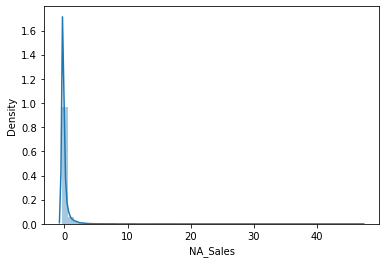

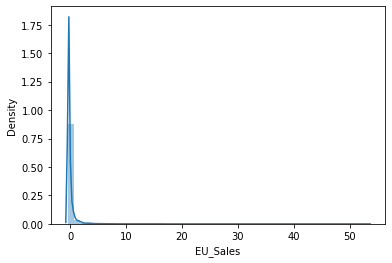

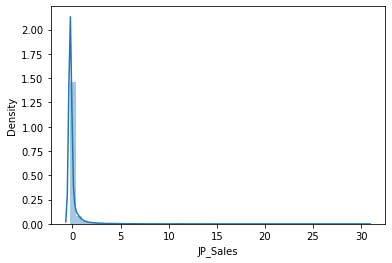

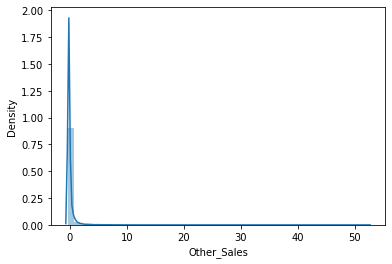

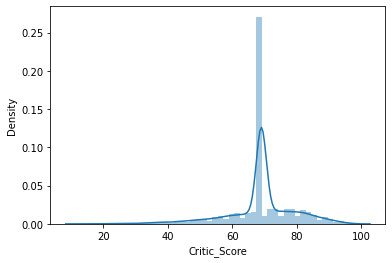

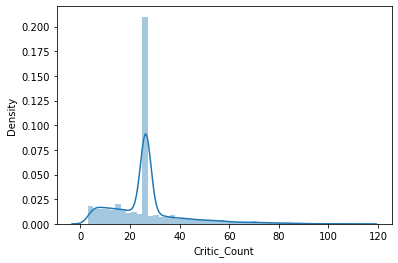

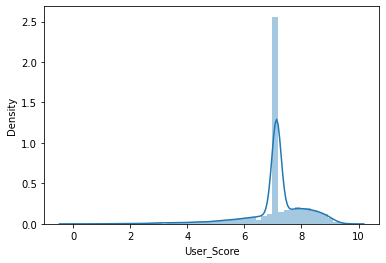

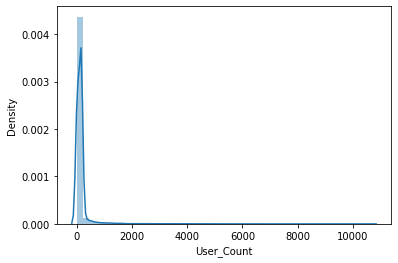

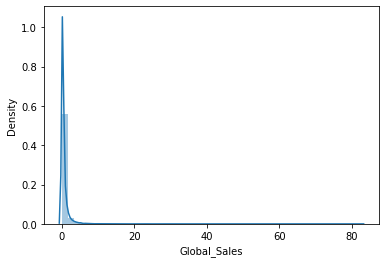

In [ ]:
for col in numcols:

    sns.distplot(df[col])
    plt.show()

In [ ]:
df[numcols]= df[numcols].abs()

In [ ]:
for col in numcols:
    df[col] = np.log(df[col]+1)
    
   
    
df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales,Platform,Genre
0,3.871176,3.992887,2.492131,3.755625,4.343805,3.951244,2.197225,5.777652,4.425206,26,10
1,3.524630,1.988539,3.055510,1.516513,4.248033,3.309112,2.094951,5.095160,3.719409,11,4
2,2.923242,3.189281,2.497097,2.838622,4.418841,4.304065,2.230014,6.565265,3.597860,26,6
3,2.918925,3.039215,2.362078,2.734423,4.394449,4.304065,2.197225,5.262690,3.519573,26,10
4,2.606618,2.840165,3.449672,1.740547,4.248033,3.309112,2.094951,5.095160,3.477232,5,7
...,...,...,...,...,...,...,...,...,...,...,...
16702,0.290279,0.271216,0.226332,0.242242,3.891820,2.397895,2.094951,5.095160,0.009950,4,5
16706,0.298806,0.257025,0.226332,0.242242,4.110874,2.564949,2.104134,2.639057,0.009950,13,11
16709,0.298806,0.257025,0.226332,0.242242,4.158883,1.945910,1.916923,2.197225,0.009950,13,1
16713,0.298806,0.271216,0.226332,0.242242,4.248033,3.309112,2.094951,5.095160,0.009950,16,6


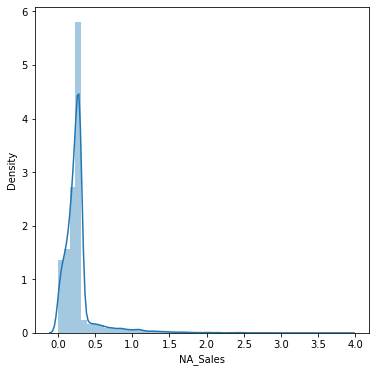

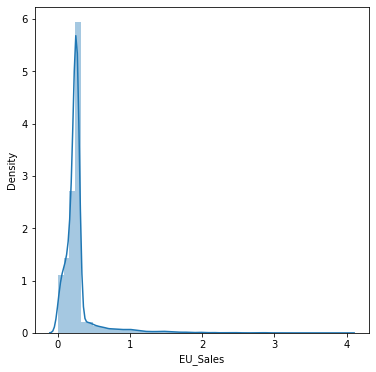

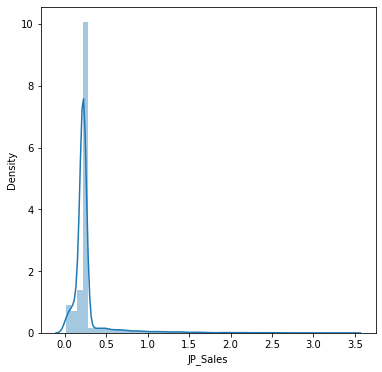

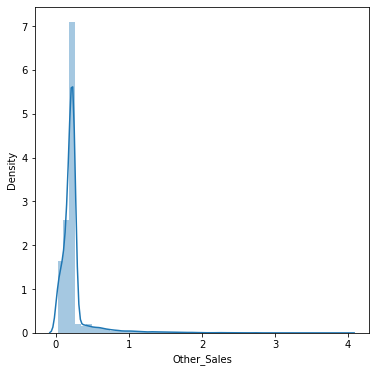

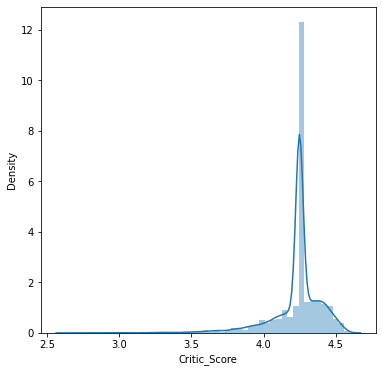

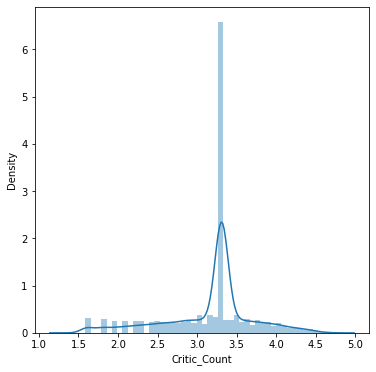

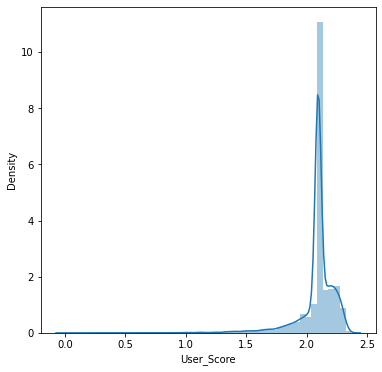

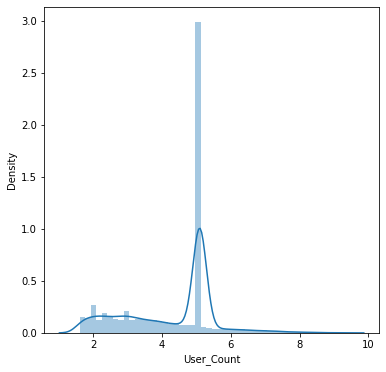

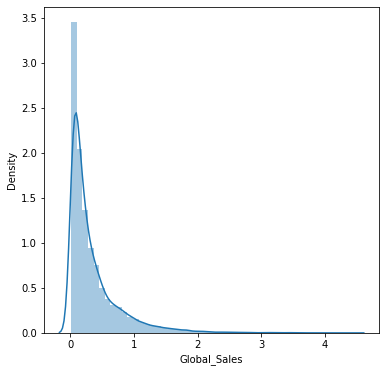

In [ ]:
for col in numcols:
    plt.figure(figsize = (6,6))
    sns.distplot(df[col])
    plt.show()

In [ ]:
X = df.drop(['Global_Sales'], axis=1)
y = df[['Global_Sales']]

In [ ]:
x_train ,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(max_depth=5,min_samples_leaf=3, min_samples_split =2)

In [ ]:
tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

In [ ]:
train_pred=tree.predict(x_train)
test_pred=tree.predict(x_test)     

In [ ]:
train_acc =r2_score(y_train, train_pred)
test_acc= r2_score(y_test, test_pred)

In [ ]:
print('train acc :', train_acc)
print('test acc:', test_acc)

train acc : 0.927829298976885
test acc: 0.9257956876676492


In [ ]:
train_mse =mean_squared_error(y_train, train_pred)
test_mse= mean_squared_error(y_test, test_pred)

In [ ]:
print('train mse :', train_mse)
print('test mse:', test_mse)

train mse : 0.01207207379357742
test mse: 0.013704388177572892


In [ ]:
param_grid = {
    'max_depth': range(1, 5),
    'min_samples_split': [2, 5, 6],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rand = RandomForestRegressor(max_depth=18,min_samples_leaf=2,min_samples_split=5)

In [ ]:
grid_cv = GridSearchCV(rand, param_grid, cv=5)

In [ ]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=18, min_samples_leaf=2,
                                             min_samples_split=5),
             param_grid={'max_depth': range(1, 5),
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 6]})

In [ ]:
train_p2=grid_cv.predict(x_train)
test_p2=grid_cv.predict(x_test) 

In [ ]:
train_r2 =r2_score(y_train, train_p2)
test_r2= r2_score(y_test, test_p2)

In [ ]:
print('train acc :', train_r2)
print('test acc:', test_r2)

train acc : 0.9129305148972247
test acc: 0.9116568171557553


In [ ]:
train_mse1 =mean_squared_error(y_train, train_p2)
test_mse1= mean_squared_error(y_test, test_p2)

In [ ]:
rmse = np.sqrt(train_mse1)
rmse2 = np.sqrt(test_mse1)

In [ ]:
print('train mse :', train_mse1)
print('test mse:', test_mse1)

train mse : 0.014564210052398446
test mse: 0.016315618762388344


In [ ]:
print('RMSE :', rmse)
print('RMSE:', rmse2)

RMSE : 0.12068226900584214
RMSE: 0.12773260649649465
